In [2]:
# to determine muon distribution from ATLAS data

import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
results = []
with open('data/cosmicray_events.txt') as inputfile:
    for line in inputfile:
        results.append(line.strip().split(','))

In [4]:
# divide with each event
results_per_event = []

for i in range(len(results)):
    if i%12 == 0:
        results_per_event.append(results[i:i+12])

Nev = len(results_per_event)  # number of events
# results_per_event


In [29]:
Nev

65

In [5]:
# get phi component and number of hits
phi0_arr = np.zeros(Nev)
phi0_err_arr = np.zeros(Nev)

nhits_arr = np.zeros(Nev)


for i, event_dets in enumerate(results_per_event):
    # print(event_dets[6][0])
    phi0_str = event_dets[6][0]
    # truncate string and split string based on Â
    phi0_str_list = phi0_str.split("Â")
    # remove "phi0 = "
    phi0 = float(phi0_str_list[0][6:])
    # remove +- sign
    phi0_err = float(phi0_str_list[1][2:])
    
    # apend
    phi0_arr[i] = phi0
    phi0_err_arr[i] = phi0_err

    # get nhits
    nhits = int(event_dets[3][0].split("=")[1])
    nhits_arr[i] = nhits


In [26]:
# convert from phi to theta (theta is angle from local zenith == y axis in this case)
# theta is defined in [-pi/2., pi/2] and phi is defined in [0, 2pi] from the x axis
theta = np.zeros_like(phi0_arr)
for i, phi0 in enumerate(phi0_arr):
    # do this by each quadrant
    if phi0 > 0. and phi0 < 90.:
        theta[i] = (phi0 - 90.)
    if phi0 > 90. and phi0 < 180.:
        theta[i] = (phi0 - 90.)
    if phi0 > 180. and phi0 < 270.:
        theta[i] = (phi0 - 90.)
    if phi0 > 270.:
        theta[i] = (phi0 - 90.) - 360.

# theta = np.abs(np.deg2rad(phi0_arr) - np.pi / 2.)
theta_err = phi0_err_arr
print(theta)


[  -2.655  170.824   -9.7    -11.085  -10.847   20.956 -154.656   -1.829
   32.123 -146.266  167.433  128.767  -49.167   41.359  -50.125   -0.311
    6.349   -6.585   -6.585   -5.405  169.364   67.466 -111.892    6.541
  -11.662    1.841 -179.342   71.741 -127.002   -9.702 -127.552    1.97
    8.142  -21.772  -14.283  -38.995   -6.308   -1.271  169.608   10.733
  -34.297  176.729  150.82  -143.388  -47.29   -22.768   33.008 -146.925
    0.634  152.282  -26.224   21.406    5.631 -175.697   -8.201   -7.587
  -29.153    9.565 -170.693    3.595 -173.012   32.538 -148.054   22.264
 -164.406]


[0.         0.         0.00328283 0.00328283 0.00820707 0.01313131
 0.02462121 0.00492424 0.00984848 0.00164141 0.         0.00328283
 0.        ]


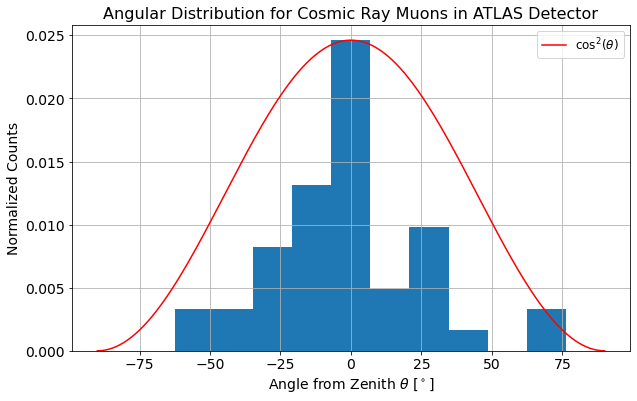

In [31]:
# plot theta vs number of entries

fig, ax = plt.subplots(figsize=(10,6))

x, bins, _ = ax.hist(theta, bins=13, range=(-90, 90), density=True)
print(x)
theta_fit = np.linspace(-90, 90, 500)
ax.plot(theta_fit, np.max(x) * np.cos(np.deg2rad(theta_fit))**2., label=r"$\cos^2(\theta)$", color="r")
ax.set_xlabel(r"Angle from Zenith $\theta$ [$^\circ$]", fontsize=14)
ax.set_ylabel("Normalized Counts", fontsize=14)
ax.set_title("Angular Distribution for Cosmic Ray Muons in ATLAS Detector", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.grid()
ax.legend(prop={"size":12})

plt.savefig("report/figures/muon_angdist.pdf", dpi=400, tight_layout=True)